# PYTHON CODE FOR POLYNOMIAL REGRESSION

# Read Dataset

In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [ ]:
X = df.drop(['Position', 'Salary'], axis=1)

In [ ]:
y = df['Salary']

In [ ]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

# Plotting Initial Dataset

Text(0, 0.5, 'Salary')

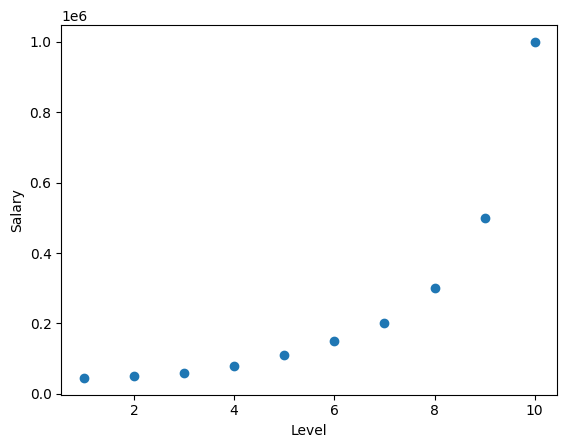

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('Level')
plt.ylabel('Salary')

# Preprocessing Dataset

In [ ]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train # Dataframe

,Level
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


In [ ]:
X_train.to_numpy() # 2 Dimension Array

array([[ 6],
       [ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [ ]:
y_train

5     150000
0      45000
7     300000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64

# Modelling

$Y = β_0 + β_1X + β_2X^2 + … + β_hX^h + ε$

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X_train.to_numpy())

model_lr_poly = LinearRegression()
model_lr_poly.fit(X_poly, y_train)


LinearRegression()

In [ ]:
X_poly

array([[1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04]])

In [ ]:
# Print The Regression Coefficients
model_lr_poly.coef_

array([     0.        , 116355.39328243, -72923.53182752,  21032.71171424,
        -2643.13637708,    125.44408403])

In [ ]:
print('Coefficients: ', model_lr_poly.coef_)

Coefficients:  [     0.         116355.39328243 -72923.53182752  21032.71171424
  -2643.13637708    125.44408403]


In [ ]:
# Print The Regression Intercept/Bias
model_lr_poly.intercept_

-16948.024660822004

In [ ]:
print('Intercept: ', model_lr_poly.intercept_)

Intercept:  -16948.024660822004


# Testing the Model

In [ ]:
y_tr_pred = model_lr_poly.predict(poly_reg.fit_transform(X_train.to_numpy()))

In [ ]:
y_te_pred = model_lr_poly.predict(poly_reg.fit_transform(X_test.to_numpy()))

In [ ]:
y_tr_pred

array([ 148951.37224752,   44998.85621529,  299802.62732519,
         60078.45089957, 1000009.07190326,  110882.13726555,
         79602.41845565,  200675.06568799])

In [ ]:
y_te_pred

array([522021.22443274,  54054.35696367])

# Sorting the Index of the Results

In [ ]:
df_pred = pd.DataFrame({'Level': X_train['Level'],
                         'Salary': y_train,
                         'salary_prediction': y_tr_pred})
df_pred.sort_index(inplace=True)
df_pred



,Level,Salary,salary_prediction
0,1,45000,4.499886e+04
2,3,60000,6.007845e+04
3,4,80000,7.960242e+04
4,5,110000,1.108821e+05
5,6,150000,1.489514e+05
6,7,200000,2.006751e+05
7,8,300000,2.998026e+05
9,10,1000000,1.000009e+06


# Performance Evaluation Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Performance Evaluation on Training Data
lr_poly_train_rms = np.sqrt(mean_squared_error(y_tr_pred,y_train))
lr_poly_train_r2 = r2_score(y_tr_pred,y_train)
# lr_poly_train_mae = mean_absolute_error(y_tr_pred,y_train)
# lr_poly_train_mape = mean_absolute_percentage_error(y_tr_pred,y_train)
# lr_poly_train_mse = mean_squared_error(y_tr_pred,y_train)

print('Root Mean Square Error: ', lr_poly_train_rms)
print('R2 Scored: ', lr_poly_train_r2)
# print('Mean Absolute Error: ', lr_poly_train_mae)
# print('Mean Absolute Percentage Error: ', lr_poly_train_mape)
# print('Mean Square Error: ', lr_poly_train_mse)

Root Mean Square Error:  563.1124676887727
R2 Scored:  0.9999963953312697


In [ ]:
# Performance Evaluation on Testing Data
lr_poly_test_rms = np.sqrt(mean_squared_error(y_te_pred,y_test))
lr_poly_test_r2 = r2_score(y_te_pred,y_test)
# lr_poly_test_mae = mean_absolute_error(y_te_pred,y_test)
# lr_poly_test_mape = mean_absolute_percentage_error(y_te_pred,y_test)
# lr_poly_test_mse = mean_squared_error(y_te_pred,y_test)

print('Root Mean Square Error: ', lr_poly_test_rms)
print('R2 Scored: ', lr_poly_test_r2)
# print('Mean Absolute Error: ', lr_poly_test_mae)
# print('Mean Absolute Percentage Error: ', lr_poly_test_mape)
# print('Mean Square Error: ', lr_poly_test_mse)

Root Mean Square Error:  15833.068810341727
R2 Scored:  0.9954211124467162


# Plotting the Result

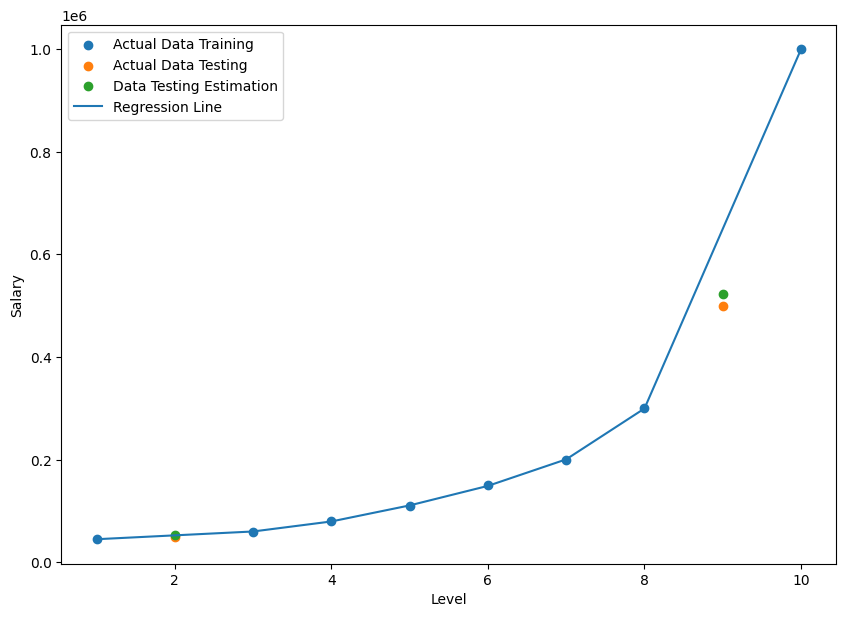

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train,y_train, label='Actual Data Training')
# plt.scatter(X_train,y_tr_pred, label='Data Training Estimation ')
plt.scatter(X_test,y_test, label='Actual Data Testing')
plt.scatter(X_test,y_te_pred, label='Data Testing Estimation')

# plotting the regression line
plt.plot(df_pred['Level'], df_pred['salary_prediction'], label='Regression Line')

plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
# Making Range of Data Between 1 and 10
X_plot=np.arange(1, 10.1, 0.1).reshape(-1,1)
X_plot

array([[ 1. ],
       [ 1.1],
       [ 1.2],
       [ 1.3],
       [ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.3],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.7],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3.1],
       [ 3.2],
       [ 3.3],
       [ 3.4],
       [ 3.5],
       [ 3.6],
       [ 3.7],
       [ 3.8],
       [ 3.9],
       [ 4. ],
       [ 4.1],
       [ 4.2],
       [ 4.3],
       [ 4.4],
       [ 4.5],
       [ 4.6],
       [ 4.7],
       [ 4.8],
       [ 4.9],
       [ 5. ],
       [ 5.1],
       [ 5.2],
       [ 5.3],
       [ 5.4],
       [ 5.5],
       [ 5.6],
       [ 5.7],
       [ 5.8],
       [ 5.9],
       [ 6. ],
       [ 6.1],
       [ 6.2],
       [ 6.3],
       [ 6.4],
       [ 6.5],
       [ 6.6],
       [ 6.7],
       [ 6.8],
       [ 6.9],
       [ 7. ],
       [ 7.1],
       [ 7.2],
       [ 7.3],
       [ 7.4],
       [ 7.5],
       [ 7

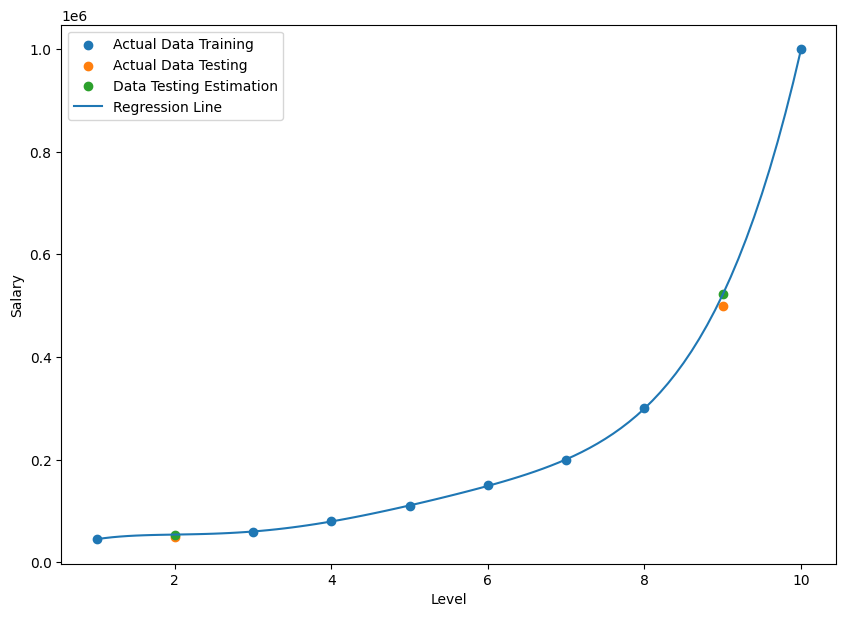

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train,y_train, label='Actual Data Training')
# plt.scatter(X_train,y_tr_pred, label='Data Training Estimation ')
plt.scatter(X_test,y_test, label='Actual Data Testing')
plt.scatter(X_test,y_te_pred, label='Data Testing Estimation')

# plotting the regression line smoother
plt.plot(X_plot,model_lr_poly.predict(poly_reg.fit_transform(X_plot)), label='Regression Line')

plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()